In [16]:
import xgboost as xgb
import pandas as pd
import numpy as np
from datetime import timedelta
from pprint import pprint
import dataframe_image as dfi
import matplotlib.pyplot as plt
import sklearn.metrics as mtr
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance

pd.options.display.max_colwidth = 200

In [17]:
df = pd.read_json("rota33642_clima.json")

df["data_partida"] = pd.to_datetime(df["data_partida"])

df

,data_partida,data_chegada,linha,tempo_viagem,equipamento,dia_semana,partidaTimeStamp,qtdDiasAno,direcao,tipo_dia,turno_dia,chegadaTimeStamp,hora,hora_dia,Precipitacao,Umidade,Vento,Datetime,Temperatura
0,1970-01-01 00:26:02.047200,2019-07-02 05:47:44,33642,713,1083,2,1562056551,183,2,1,2,1562057264,NaN,5,0.0,76,0.6,2019-07-02 06:00:00,16.70
1,1970-01-01 00:26:02.047200,2019-07-02 06:25:15,33642,848,1083,2,1562058667,183,2,1,2,1562059515,NaN,6,0.0,76,0.6,2019-07-02 06:00:00,16.70
2,1970-01-01 00:26:02.050800,2019-07-02 07:08:02,33642,876,1083,2,1562061206,183,2,1,2,1562062082,NaN,6,0.0,77,0.0,2019-07-02 07:00:00,16.75
3,1970-01-01 00:26:02.054400,2019-07-02 07:55:03,33642,1099,1083,2,1562063804,183,2,1,2,1562064903,NaN,7,0.0,69,0.1,2019-07-02 08:00:00,17.65
4,1970-01-01 00:26:02.054400,2019-07-02 08:30:55,33642,858,1083,2,1562066197,183,2,1,2,1562067055,NaN,8,0.0,69,0.1,2019-07-02 08:00:00,17.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9309,1970-01-01 00:26:09.844800,2019-09-30 12:18:00,33642,1237,62620,1,1569855443,273,2,1,2,1569856680,NaN,11,0.0,31,2.6,2019-09-30 12:00:00,24.55
9310,1970-01-01 00:26:09.848400,2019-09-30 13:18:00,33642,1457,62620,1,1569858823,273,2,1,3,1569860280,NaN,12,0.0,31,1.6,2019-09-30 13:00:00,25.80
9311,1970-01-01 00:26:09.852000,2019-09-30 14:22:36,33642,1024,62620,1,1569863132,273,2,1,3,1569864156,NaN,14,0.0,22,1.3,2019-09-30 14:00:00,27.05
9312,1970-01-01 00:26:09.866400,2019-09-30 18:48:13,33642,1324,62620,1,1569878769,273,2,1,4,1569880093,NaN,18,0.0,59,1.8,2019-09-30 18:00:00,22.40


In [18]:
#Separação teste e treino
shape = int(df.shape[0] * 0.3)
df = df.sort_values(by=["data_partida"], ascending=False)
df_teste = df[:shape]
df_treino = df[shape:]

In [19]:
metrics = []

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[19:05:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:05:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1177.14076
[1]	validation_0-rmse:1171.38757
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28500/1412862535.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["predicao_xgb"] = modelo_xgb.predict(x_teste)
C:\Users\leovi\AppData\Local\Temp/ipykernel_28500/1412862535.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["predicao_lr"] = modelo_lr.predict(x_teste)
C:\Users\leovi\AppData\Local\Temp/ipykernel_28500/1412862535.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[19:09:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:09:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1177.14076
[1]	validation_0-rmse:1171.38757
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28500/1412862535.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["predicao_xgb"] = modelo_xgb.predict(x_teste)
C:\Users\leovi\AppData\Local\Temp/ipykernel_28500/1412862535.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["predicao_lr"] = modelo_lr.predict(x_teste)
C:\Users\leovi\AppData\Local\Temp/ipykernel_28500/1412862535.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[19:12:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:12:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1177.14076
[1]	validation_0-rmse:1171.38757
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28500/1412862535.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["predicao_xgb"] = modelo_xgb.predict(x_teste)
C:\Users\leovi\AppData\Local\Temp/ipykernel_28500/1412862535.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["predicao_lr"] = modelo_lr.predict(x_teste)
C:\Users\leovi\AppData\Local\Temp/ipykernel_28500/1412862535.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[19:16:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:16:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1177.14076
[1]	validation_0-rmse:1171.38757
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28500/1412862535.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["predicao_xgb"] = modelo_xgb.predict(x_teste)
C:\Users\leovi\AppData\Local\Temp/ipykernel_28500/1412862535.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["predicao_lr"] = modelo_lr.predict(x_teste)
C:\Users\leovi\AppData\Local\Temp/ipykernel_28500/1412862535.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

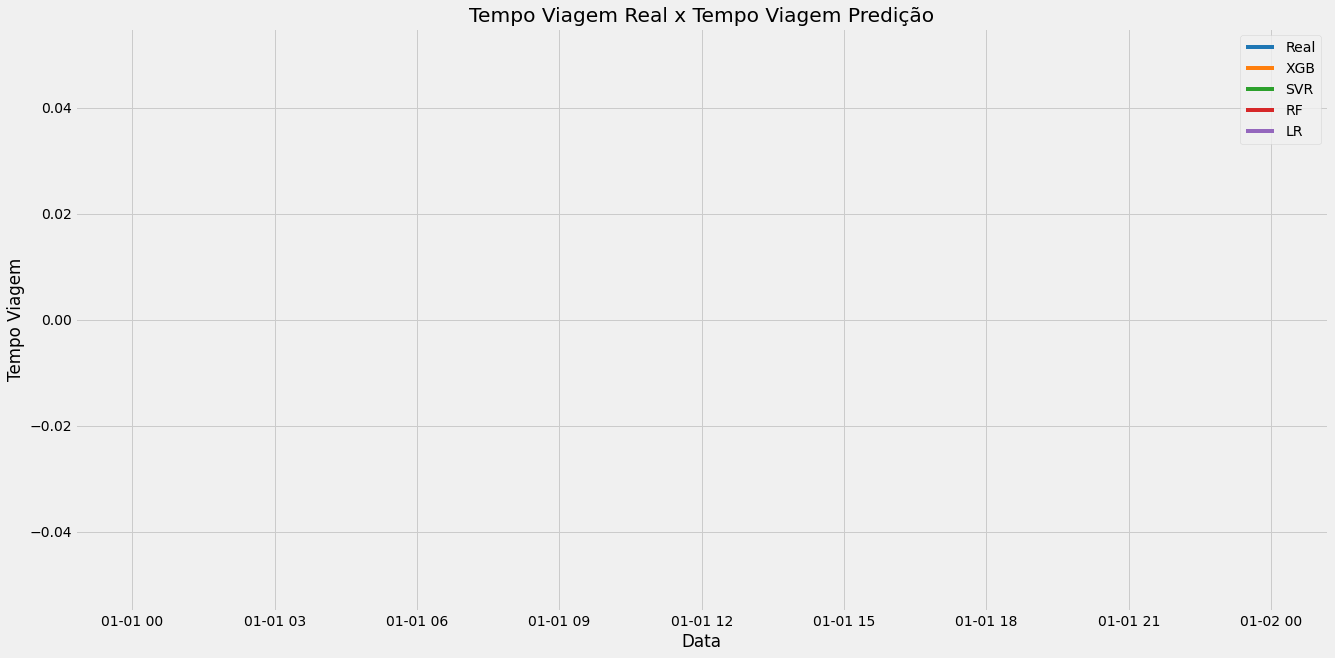

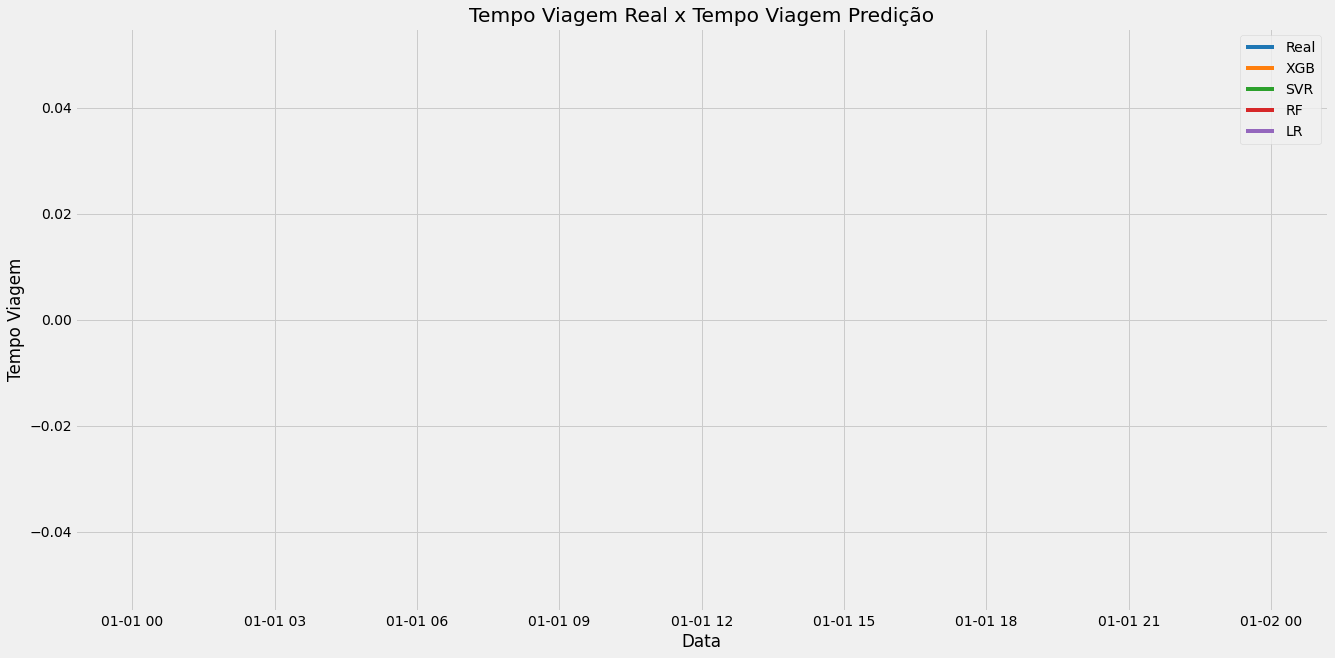

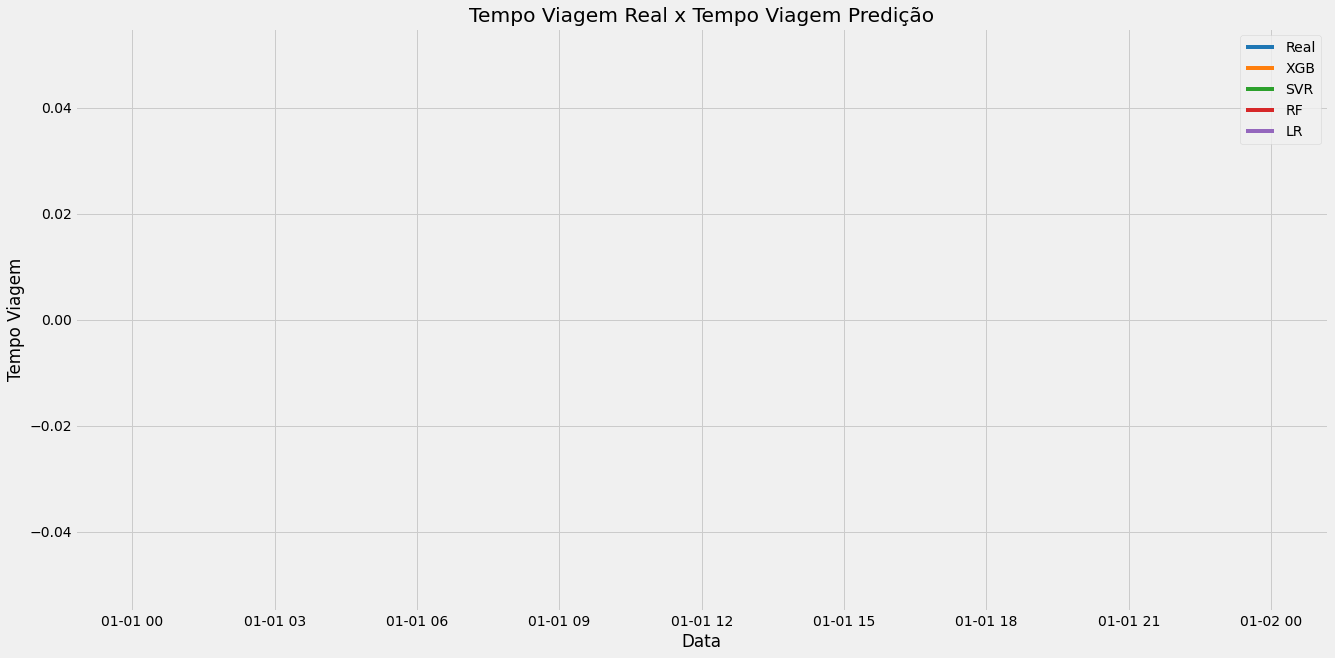

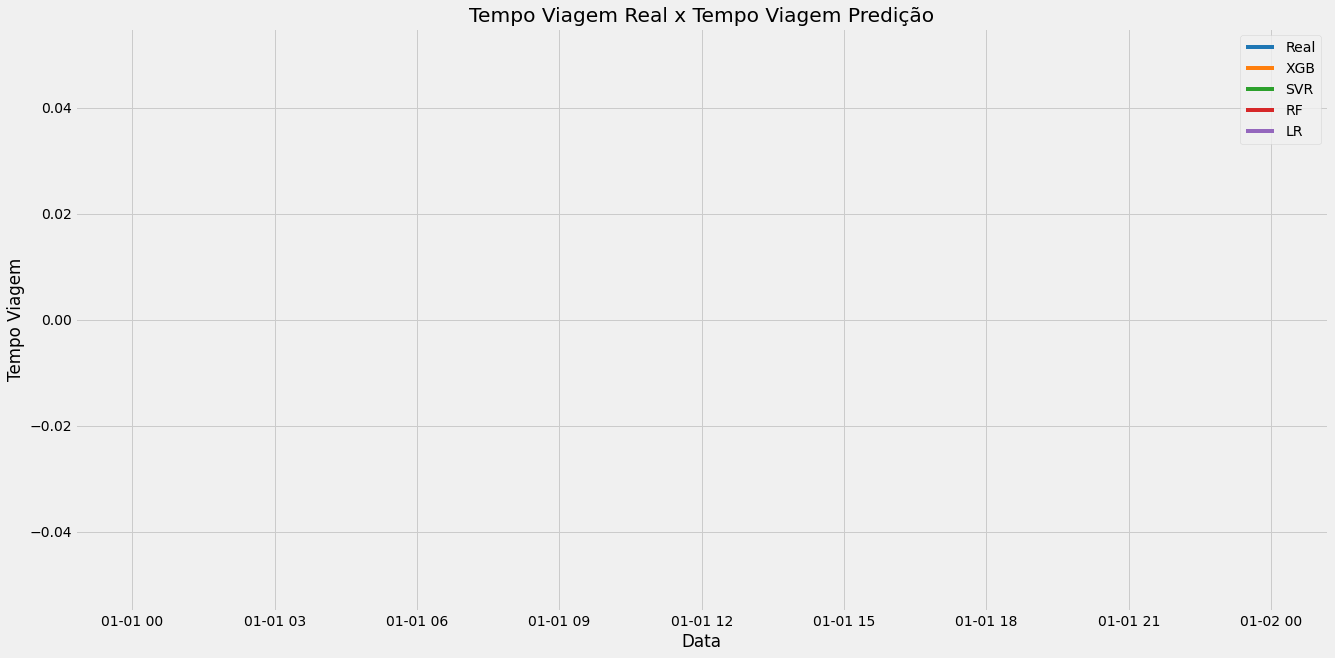

In [20]:
for cenario in range(0, 4):
        if cenario == 0:
                x_teste = df_teste[["partidaTimeStamp", "dia_semana", "tipo_dia", "hora_dia"]]
                y_teste = df_teste["tempo_viagem"]
                x_treino = df_treino[["partidaTimeStamp", "dia_semana", "tipo_dia", "hora_dia"]]
                y_treino = df_treino["tempo_viagem"]

        elif cenario == 1:
                x_teste = df_teste[["partidaTimeStamp", "dia_semana", "tipo_dia", "hora_dia", "turno_dia"]]
                y_teste = df_teste["tempo_viagem"]
                x_treino = df_treino[["partidaTimeStamp", "dia_semana", "tipo_dia", "hora_dia", "turno_dia"]]
                y_treino = df_treino["tempo_viagem"]
        
        elif cenario == 2:
                x_teste = df_teste[["partidaTimeStamp", "dia_semana", "tipo_dia", "hora_dia", "qtdDiasAno"]]
                y_teste = df_teste["tempo_viagem"]
                x_treino = df_treino[["partidaTimeStamp", "dia_semana", "tipo_dia", "hora_dia", "qtdDiasAno"]]
                y_treino = df_treino["tempo_viagem"]
        
        else:
                x_teste = df_teste[["partidaTimeStamp", "dia_semana", "tipo_dia", "hora_dia", "turno_dia", "qtdDiasAno"]]
                y_teste = df_teste["tempo_viagem"]
                x_treino = df_treino[["partidaTimeStamp", "dia_semana", "tipo_dia", "hora_dia", "turno_dia", "qtdDiasAno"]]
                y_treino = df_treino["tempo_viagem"]
        

        # Hyperparâmetros do XGBoosting
        params_xgb = {
                "n_estimators": list(range(100, 1100, 100)), #Number of gradient boosted trees. Equivalent to number of boosting rounds
                "max_depth": list(range(2, 15)),#Maximum tree depth for base learners.
                "min_child_weight": list(range(1, 11)),#Minimum sum of instance weight(hessian) needed in a child.
                "learning_rate": [0.3, 0.2, 0.1, 0.05, 0.01, 0.005],#Boosting learning rate (xgb’s “eta”)
                "gamma": np.arange(0, 0.7, 0.1)#Minimum loss reduction required to make a further partition on a leaf node of the tree.
                }

        # Hyperparâmetros do Random Forest
        params_rf = {
                "n_estimators": list(range(100, 1100, 100)),#The number of trees in the forest.
                "bootstrap": [True, False],#Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
                "max_depth": list(range(2, 15)),#The maximum depth of the tree.
                "max_features": [1.0, "sqrt", "log2"],#The number of features to consider when looking for the best split:
                "min_samples_leaf": list(range(1, 11)),#The minimum number of samples required to split an internal node
                "min_samples_split": list(range(2, 11)),#The minimum number of samples required to be at a leaf node.
                }

        # Hyperparâmetros do SVR
        params_svr = {
                "C": [0.1, 1, 10, 100, 1000], #Regularization parameter. The strength of the regularization is inversely proportional to C
                "gamma": ["scale", "auto"],#Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
                }

        #Linear Regression não tem hyper parametrização


        #Criação e fit do modelo XGB
        modelo_xgb = xgb.XGBRegressor(early_stop_rounds = 100)
        xgb_rand_search = RandomizedSearchCV(modelo_xgb, params_xgb, scoring="neg_mean_squared_error", n_iter=40, verbose=True, cv=10, n_jobs=-1, random_state=123)
        xgb_rand_search.fit(x_treino, y_treino)
        modelo_xgb = xgb_rand_search.best_estimator_

        modelo_xgb.fit(x_treino, y_treino, eval_set = [(x_treino, y_treino)])


        #Criação e fit do modelo Random Forest
        modelo_rf = RandomForestRegressor()
        rf_rand_search = RandomizedSearchCV(modelo_rf, params_rf, scoring="neg_mean_squared_error", n_iter=40, verbose=True, cv=10, n_jobs=-1, random_state=123)
        rf_rand_search.fit(x_treino, y_treino)
        modelo_rf = rf_rand_search.best_estimator_

        modelo_rf.fit(x_treino, y_treino)


        #Criação e fit do modelo SVR
        modelo_svr = SVR(kernel = 'rbf')
        svr_rand_search = RandomizedSearchCV(modelo_svr, params_svr, scoring="neg_mean_squared_error", n_iter=10, verbose=True, cv=10, n_jobs=-1, random_state=123)
        svr_rand_search.fit(x_treino, y_treino)
        modelo_svr = svr_rand_search.best_estimator_

        modelo_svr.fit(x_treino, y_treino)


        #Criação e fit do modelo Linear Regression
        modelo_lr = LinearRegression()
        modelo_lr.fit(x_treino, y_treino)

        df_teste["predicao_xgb"] = modelo_xgb.predict(x_teste)
        df_teste["predicao_lr"] = modelo_lr.predict(x_teste)
        df_teste["predicao_rf"] = modelo_rf.predict(x_teste)
        df_teste["predicao_svr"] = modelo_svr.predict(x_teste)


        RRSE_xgb = np.sqrt(sum((df_teste["tempo_viagem"] - df_teste["predicao_xgb"]) ** 2) / sum((df_teste["tempo_viagem"] - np.mean(df_teste["tempo_viagem"])) ** 2))
        RMSE_xgb = mtr.mean_squared_error(df_teste["tempo_viagem"], df_teste["predicao_xgb"], squared=False) 
        MAPE_xgb = mtr.mean_absolute_percentage_error(df_teste["tempo_viagem"], df_teste["predicao_xgb"])

        RRSE_rf = np.sqrt(sum((df_teste["tempo_viagem"] - df_teste["predicao_rf"]) ** 2) / sum((df_teste["tempo_viagem"] - np.mean(df_teste["tempo_viagem"])) ** 2))
        RMSE_rf = mtr.mean_squared_error(df_teste["tempo_viagem"], df_teste["predicao_rf"], squared=False) 
        MAPE_rf = mtr.mean_absolute_percentage_error(df_teste["tempo_viagem"], df_teste["predicao_rf"])

        RRSE_svr = np.sqrt(sum((df_teste["tempo_viagem"] - df_teste["predicao_svr"]) ** 2) / sum((df_teste["tempo_viagem"] - np.mean(df_teste["tempo_viagem"])) ** 2))
        RMSE_svr = mtr.mean_squared_error(df_teste["tempo_viagem"], df_teste["predicao_svr"], squared=False) 
        MAPE_svr = mtr.mean_absolute_percentage_error(df_teste["tempo_viagem"], df_teste["predicao_svr"])

        RRSE_lr = np.sqrt(sum((df_teste["tempo_viagem"] - df_teste["predicao_lr"]) ** 2) / sum((df_teste["tempo_viagem"] - np.mean(df_teste["tempo_viagem"])) ** 2))
        RMSE_lr = mtr.mean_squared_error(df_teste["tempo_viagem"], df_teste["predicao_lr"], squared=False) 
        MAPE_lr = mtr.mean_absolute_percentage_error(df_teste["tempo_viagem"], df_teste["predicao_lr"])

        metrics.append(['RRSE', RRSE_xgb, RRSE_rf, RRSE_svr, RRSE_lr, x_teste.columns.values])
        metrics.append(['RMSE', RMSE_xgb, RMSE_rf, RMSE_svr, RMSE_lr, x_teste.columns.values])
        metrics.append(['MAPE', MAPE_xgb, MAPE_rf, MAPE_svr, MAPE_lr, x_teste.columns.values])    

        plt.style.use("fivethirtyeight")
        
        plt.figure(figsize=(20, 10))
        
        plt.xlabel("Data")
        plt.ylabel("Tempo Viagem")
        plt.title("Tempo Viagem Real x Tempo Viagem Predição")

        df_plot_predicao = df_teste[(df_teste["data_partida"] > "2019-09-15") & (df_teste["data_partida"] < "2019-09-21")]

        plt.plot(df_plot_predicao["data_partida"], df_plot_predicao["tempo_viagem"], color="#1f77b4", label="Real")
        plt.plot(df_plot_predicao["data_partida"], df_plot_predicao["predicao_xgb"], color="#ff7f0e", label="XGB")
        plt.plot(df_plot_predicao["data_partida"], df_plot_predicao["predicao_svr"], color="#2ca02c", label="SVR")
        plt.plot(df_plot_predicao["data_partida"], df_plot_predicao["predicao_rf"], color="#d62728", label="RF")
        plt.plot(df_plot_predicao["data_partida"], df_plot_predicao["predicao_lr"], color="#9467bd", label="LR")
        plt.legend()

        plt.savefig(f"Images/Results/var_colunas/33642_line_charth__cen_{cenario}.jpg")

metrics = pd.DataFrame(metrics, columns=['Métrica', 'XGBoosting','Random Forest','Support Vector Regression','Linear Regression', 'Colunas'])

dfi.export(metrics, f"Images/Metrics/var_colunas/metrics_33642.jpg")